# Endoscopy dataset - RF on Conv feature-maps

https://www.youtube.com/watch?v=9GzfUzJeyi0

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
import keras.backend as K
from keras.utils import to_categorical

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.regularizers import l1_l2

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import plot_confusion_matrix as pcm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import PIL
import os

In [7]:
img_folder = r'C:\Users\user\ML\kvasir-capsule\norway-kaggle'
# classes = os.listdir(img_folder)
# print(classes)

num_images_per_class = []
class_name = []

empty_images = []
empty_index = []

# if the dir has a metadata.csv file
if os.path.isfile(img_folder+'/metadata.csv'):
    meta = pd.read_csv(img_folder+'/metadata.csv', sep=';')
    df = meta[['filename', 'finding_class']]
    df.columns = ['filename', 'label']

else:
    # otherwise read through the sub-directories
    df = pd.DataFrame(columns=['filename', 'label'])
    for f in os.listdir(img_folder):
        for i in os.listdir(img_folder+'\\'+f):
            df = pd.concat([df, pd.DataFrame({'filename': i, 'label': f}, index=[0])], ignore_index=True)

class_name = list(set(list(df['label'])))
for cn in class_name:
    count = 0
    for i in range(len(df)):
        if df.loc[i, 'label'] == cn:
            count += 1
    num_images_per_class.append(count)
    print(cn, count)



normal-pylorus 500
polyps 500
normal-cecum 500
esophagitis 500
normal-z-line 500
dyed-lifted-polyps 500
dyed-resection-margins 500
ulcerative-colitis 500


In [8]:
df

,filename,label
0,0053d7cd-549c-48cd-b370-b4ad64a8098a.jpg,dyed-lifted-polyps
1,007d5aa7-7289-4bad-aa4a-5c3a259e9b19.jpg,dyed-lifted-polyps
2,00cf9508-6ad1-4db9-840a-519c1d515c30.jpg,dyed-lifted-polyps
3,01507fbd-4d38-4525-9768-7754710f507c.jpg,dyed-lifted-polyps
4,018ed8ed-e489-4bbb-8a99-3346db9ec160.jpg,dyed-lifted-polyps
...,...,...
3995,fded0688-c4cd-4aad-980b-f55e161f1b44.jpg,ulcerative-colitis
3996,fe7f77f0-6bdb-4a27-8399-40d492a69957.jpg,ulcerative-colitis
3997,fe847a94-7385-40b7-9d3f-64d21dcf66b1.jpg,ulcerative-colitis
3998,ff493607-67fb-40e2-b234-b26bdb9118d3.jpg,ulcerative-colitis


In [9]:
Xs = list(df['filename'])
ys = list(df['label'])

X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.25, random_state=0, stratify=ys)

In [10]:
SIZE = 229

train_images = []
train_labels = [] 

for i, img in enumerate(X_train):

    img_path = img_folder+'\\'+y_train[i]+'\\'+img
    print(img_path)

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
    img = cv2.resize(img, (SIZE, SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(y_train[i])

train_images = np.array(train_images)
train_labels = np.array(train_labels)


C:\Users\user\ML\kvasir-capsule\norway-kaggle\esophagitis\721ca31e-0e78-447e-80d0-276004cb82e8.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\normal-pylorus\5b5116aa-3b84-43a6-bf3e-4b851d0d124c.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\normal-z-line\4232f3c8-d125-4dec-9503-b875003b758a.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\ulcerative-colitis\3a589fcf-768f-4ebf-9812-002135ef0c03.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\dyed-lifted-polyps\5452e6e1-7691-4f76-94f7-9d29d38385f8.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\polyps\fef6fc9f-0795-4a71-b99c-841a064e1e57.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\dyed-resection-margins\6dd01c33-66b5-42ca-90a3-68812fdf7d8d.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\polyps\f9f88922-841d-4a93-b8e5-3cc1b5bfc98f.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\polyps\56d36c2a-a318-4aef-a454-2b58be054342.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\polyps\d5ebe505-da7f-49f2-af03-693878673b23.jpg


In [11]:
test_images = []
test_labels = [] 

for i, img in enumerate(X_test):

    img_path = img_folder+'\\'+y_test[i]+'\\'+img
    print(img_path)

    img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
    img = cv2.resize(img, (SIZE, SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(y_test[i])

test_images = np.array(test_images)
test_labels = np.array(test_labels)

C:\Users\user\ML\kvasir-capsule\norway-kaggle\dyed-resection-margins\b2104e25-9926-4f1f-9409-94790f6fba93.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\normal-pylorus\adccc1be-4c6f-4d1e-b8b0-eccb55dfbd50.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\polyps\0a874a44-90ea-42ea-a467-92a1d3a4a26c.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\normal-pylorus\a8d8045f-0c21-4706-8b13-ad416e61fa5b.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\normal-pylorus\089feb98-72ee-4e4b-b90f-661cc7594fff.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\polyps\85812c3e-c1de-4f6b-8e5f-f8c1d7ce6848.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\dyed-resection-margins\a48ca21c-c25d-4e8f-86ca-e0eee0f55f1d.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\dyed-resection-margins\16fb48a4-7dde-41df-aa3a-a8a73de0e047.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\normal-pylorus\dd8be1a0-e023-4681-8ad6-dbe7f70395f4.jpg
C:\Users\user\ML\kvasir-capsule\norway-kaggle\dyed-resection-margins\6cc00

In [12]:
# Encode labels from text to integers
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

# Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [13]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [14]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))              
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [15]:
activation = 'relu'

model = Sequential()

conv_base = tf.keras.applications.DenseNet121(
        input_shape=(229,229,3), 
        include_top=False, 
        pooling='max',
        weights='imagenet')    
model.add(conv_base)    
model.add(BatchNormalization())    
model.add(Dense(2048, 
                activation='relu',  
                kernel_regularizer=l1_l2(0.01)))   
model.add(BatchNormalization())   
model.add(Dense(len(class_name), activation='softmax'))   

train_layers = [layer for layer in conv_base.layers[::-1][:5]]   
for layer in conv_base.layers:      
    if layer in train_layers:         
        layer.trainable = True 

# Make a new model combining both feature extractor and x
model.compile(optimizer='rmsprop', loss ='categorical_crossentropy', metrics = ['accuracy', get_f1])
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 2048)              2099200   
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 8)                 16392     
                                                                 
Total params: 9,165,384
Trainable params: 9,075,592
Non-

In [19]:
#Train the CNN model

# add a callback that saves the best model found each epoch
history = model.fit(x_train, y_train_one_hot, epochs=100, validation_data = (x_test, y_test_one_hot))


Epoch 1/100
94/94 [==============================] - 636s 7s/step - loss: 15.1964 - accuracy: 0.5423 - get_f1: 0.5206 - val_loss: 1348.8789 - val_accuracy: 0.2420 - val_get_f1: 0.1597
Epoch 2/100
94/94 [==============================] - 862s 9s/step - loss: 13.5112 - accuracy: 0.5747 - get_f1: 0.5525 - val_loss: 28.0526 - val_accuracy: 0.2700 - val_get_f1: 0.2662
Epoch 3/100
94/94 [==============================] - 516s 5s/step - loss: 12.3113 - accuracy: 0.6290 - get_f1: 0.5924 - val_loss: 38.8618 - val_accuracy: 0.4430 - val_get_f1: 0.1735
Epoch 4/100
94/94 [==============================] - 519s 6s/step - loss: 11.9373 - accuracy: 0.6557 - get_f1: 0.6314 - val_loss: 13.6788 - val_accuracy: 0.6200 - val_get_f1: 0.3224
Epoch 5/100
94/94 [==============================] - 515s 5s/step - loss: 12.0768 - accuracy: 0.6827 - get_f1: 0.6572 - val_loss: 2553.5872 - val_accuracy: 0.3580 - val_get_f1: 0.1885
Epoch 6/100
94/94 [==============================] - 514s 5s/step - loss: 11.9741 - ac

KeyboardInterrupt: 

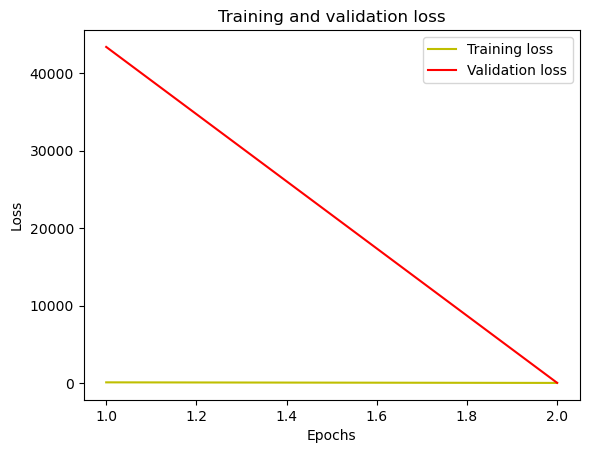

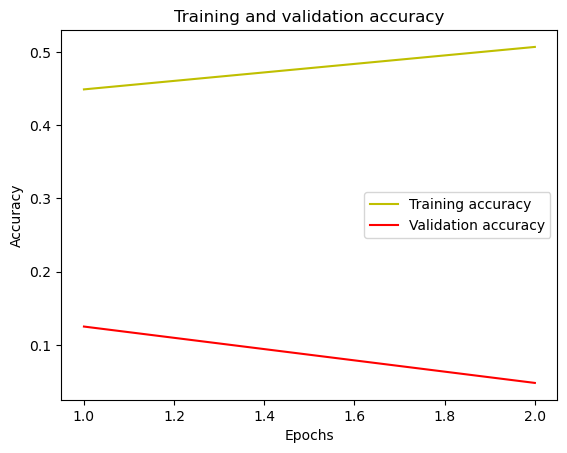

In [20]:
model.save(img_folder+'\\convRF_model.h5')

#cnn_model = tf.keras.models.load_model('conv_RF_model.h5')

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

32/32 [==============================] - 30s 939ms/step
[[105  11   0   1   0   0   8   0]
 [ 17  59   0  49   0   0   0   0]
 [  0   0 110   0   2  13   0   0]
 [  0   0   1  94   0   0   8  22]
 [  0   0   1   0 122   1   1   0]
 [  0   0  42   0   4  79   0   0]
 [  0   1   1   2   2   1 101  17]
 [  0   0   1   0   0   0   1 123]]


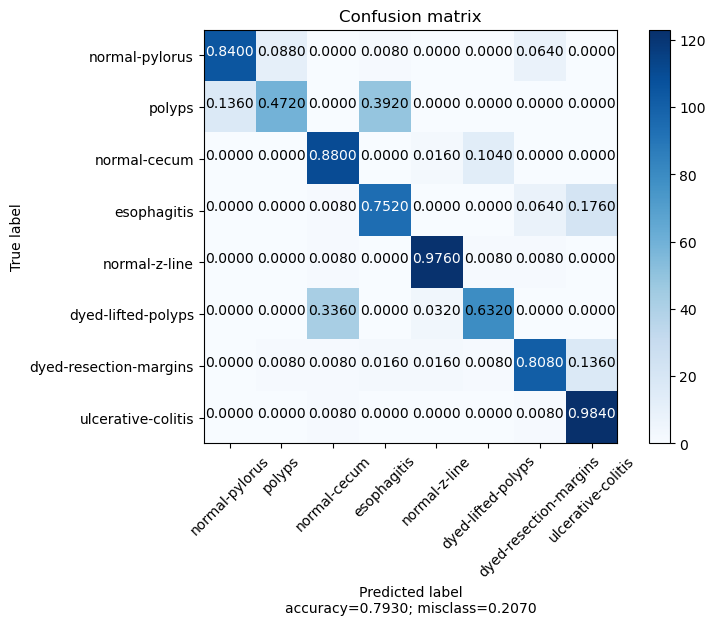

1/1 [==============================] - 0s 99ms/step
The prediction for this image is:  ['dyed-resection-margins']
The actual label for this image is:  dyed-resection-margins


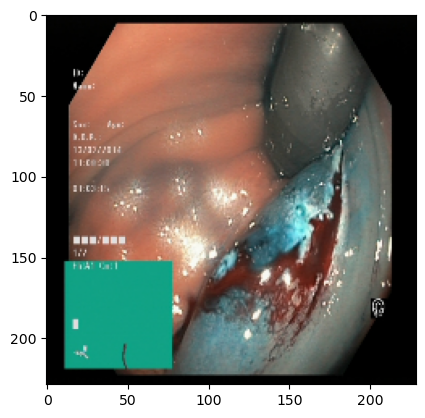

In [21]:


prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

#print ("Precision = ", metrics.precision_score(test_labels, prediction_NN))

#Confusion Matrix - verify accuracy of each class

cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
#sns.heatmap(cm, annot=True)
pcm.plot_confusion_matrix(cm, class_name)

#Check results on a few select images

#n=5 dog park. NN not as good as RF.
n=9  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

32/32 [==============================] - 29s 910ms/step
Accuracy =  0.872
[[110  12   0   0   0   0   3   0]
 [ 17 108   0   0   0   0   0   0]
 [  0   0  92   0   0  32   1   0]
 [  0   1   0 110   0   0   9   5]
 [  0   0   0   0 123   1   1   0]
 [  0   0  19   0   2 104   0   0]
 [  1   0   1   3   2   1 103  14]
 [  0   0   1   0   0   0   2 122]]


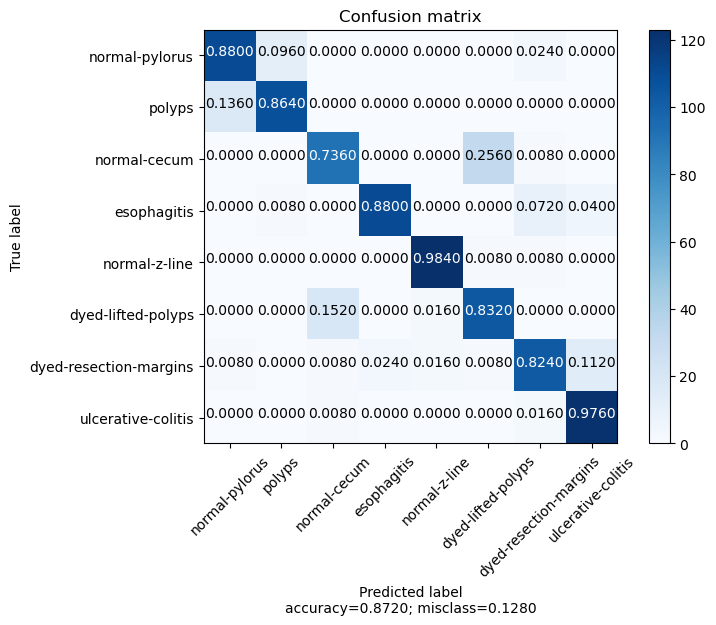

1/1 [==============================] - 0s 77ms/step
The prediction for this image is:  ['dyed-resection-margins']
The actual label for this image is:  dyed-resection-margins


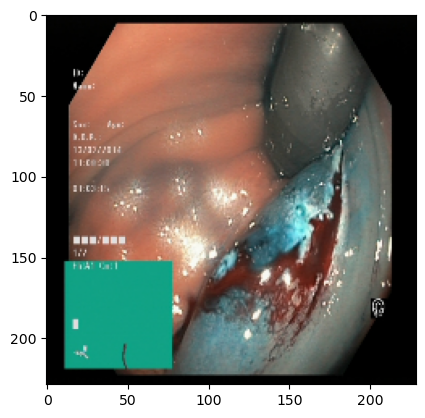

In [22]:
X_for_RF = model.predict(x_train) #This is out X input to RF



#RANDOM FOREST

RF_model = RandomForestClassifier(n_estimators = 250, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = model.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

#Print overall accuracy

print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))
#print ("Precision = ", metrics.precision_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
print(cm)
pcm.plot_confusion_matrix(cm, class_name)

#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=9 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=model.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])